In [1]:
import pandas as pd
import matplotlib.pyplot as plt

salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


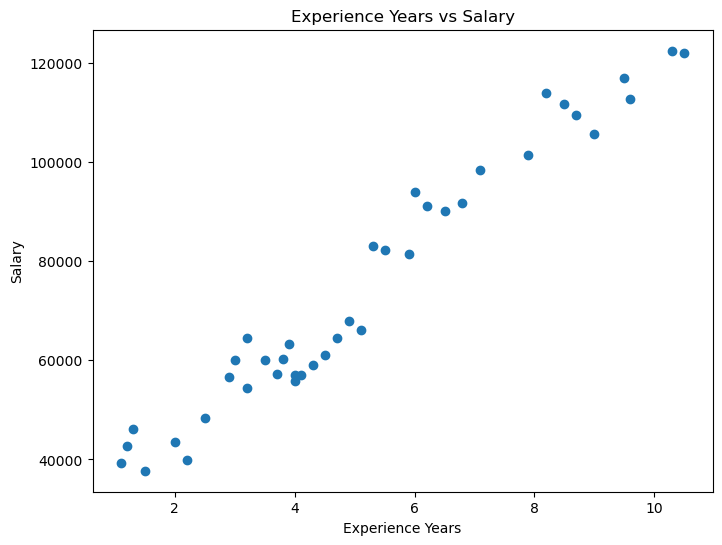

In [2]:
# scatter plot of two features with Salary and YearsExperience
plt.figure(figsize=(8, 6))
plt.scatter(salary['Experience Years'], salary['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience Years vs Salary')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
y = salary['Salary']
X = salary[['Experience Years']]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
# Step 5 : select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [5]:
model.fit(X_train,y_train)


LinearRegression()

In [6]:
model.intercept_, model.coef_

(26596.961311068262, array([9405.61663234]))

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
mean_squared_error(y_test,y_pred), mean_absolute_error(y_test,y_pred)


(24141421.671440993, 4005.9263101681768)

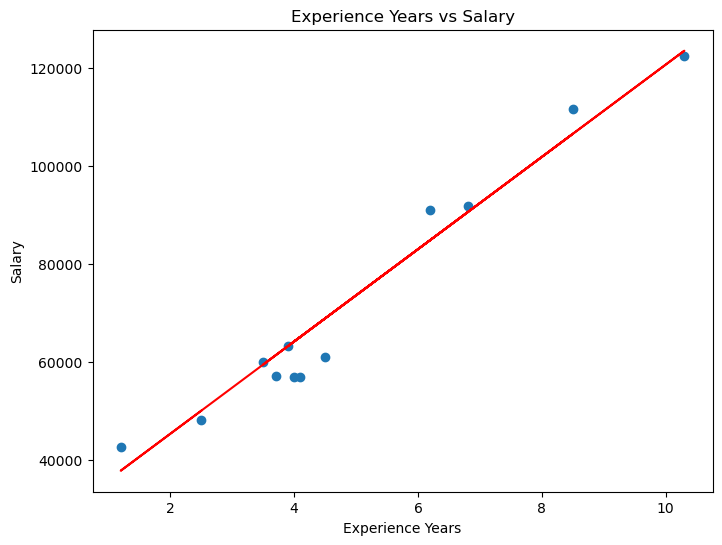

In [10]:
# plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience Years vs Salary')
plt.show()


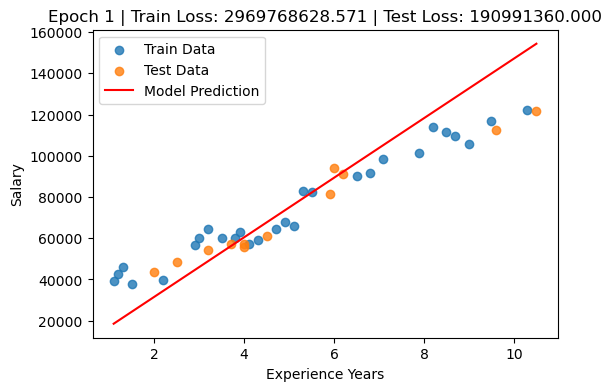

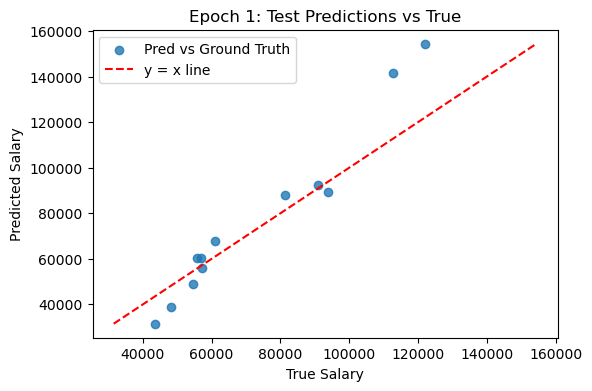

Epoch 1 | Train Loss = 2969768628.5714, Test Loss = 190991360.0000


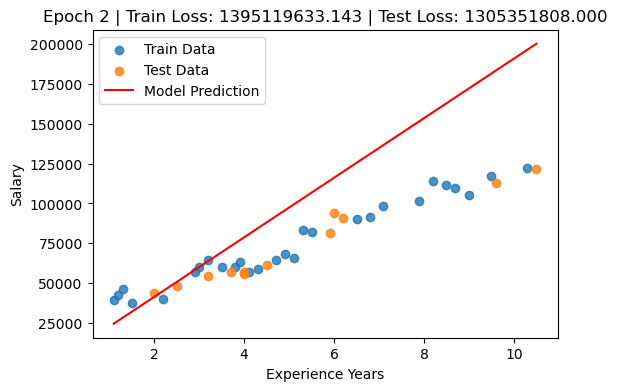

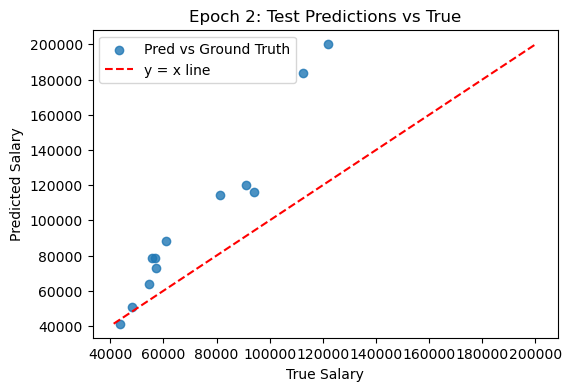

Epoch 2 | Train Loss = 1395119633.1429, Test Loss = 1305351808.0000


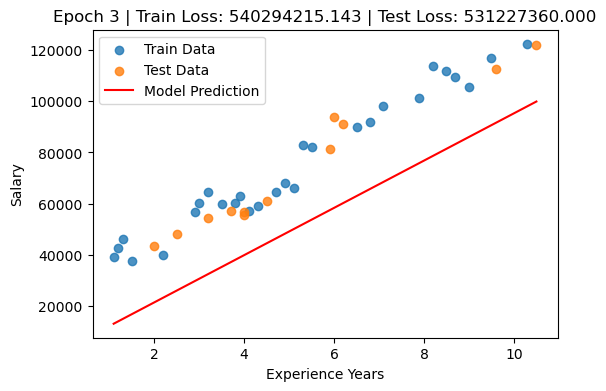

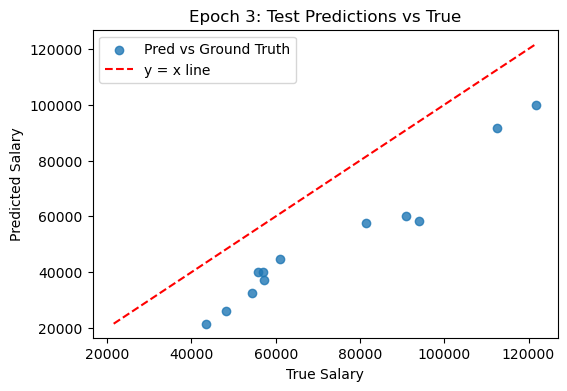

Epoch 3 | Train Loss = 540294215.1429, Test Loss = 531227360.0000


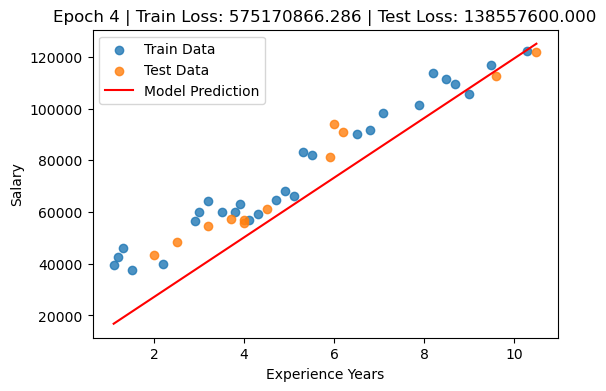

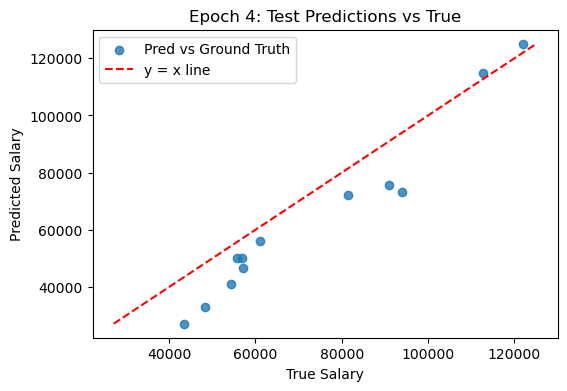

Epoch 4 | Train Loss = 575170866.2857, Test Loss = 138557600.0000


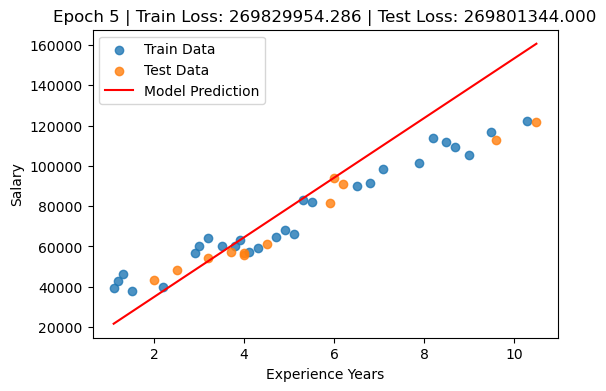

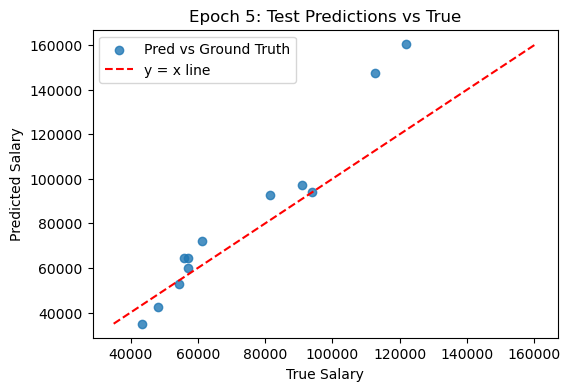

Epoch 5 | Train Loss = 269829954.2857, Test Loss = 269801344.0000


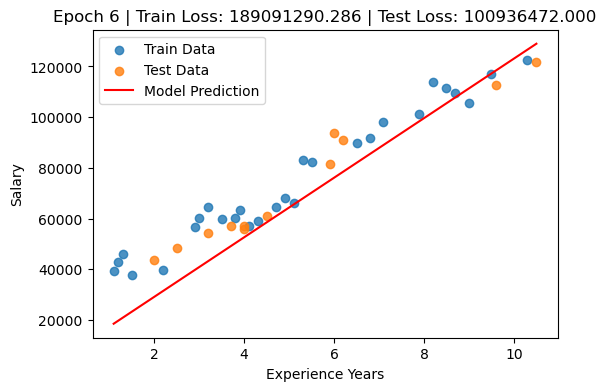

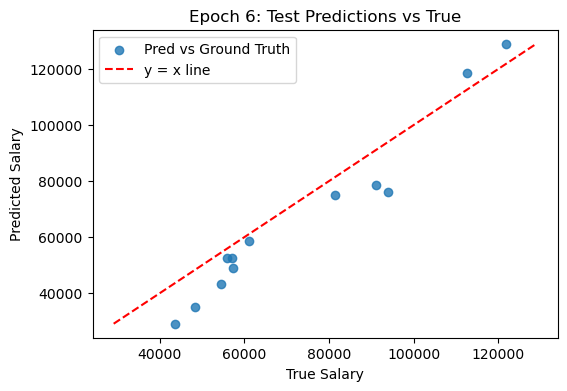

Epoch 6 | Train Loss = 189091290.2857, Test Loss = 100936472.0000


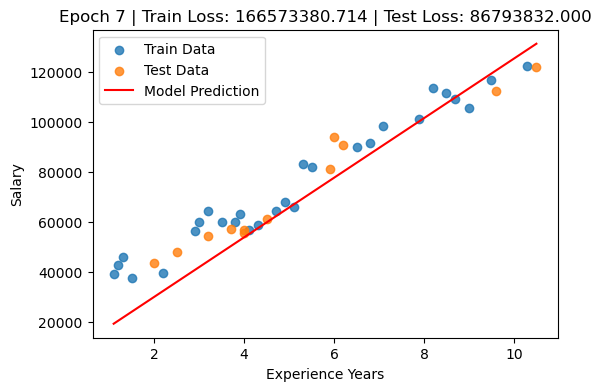

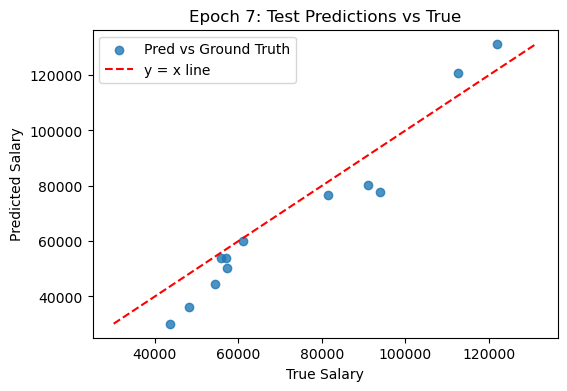

Epoch 7 | Train Loss = 166573380.7143, Test Loss = 86793832.0000


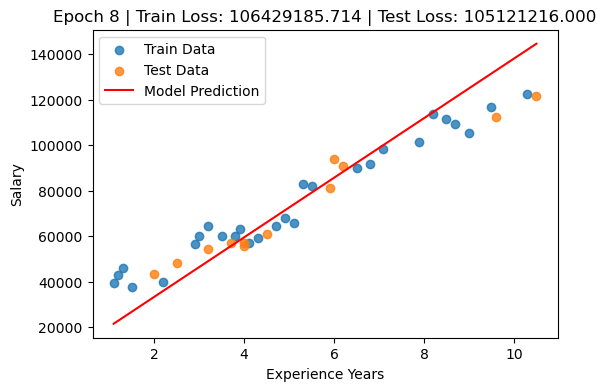

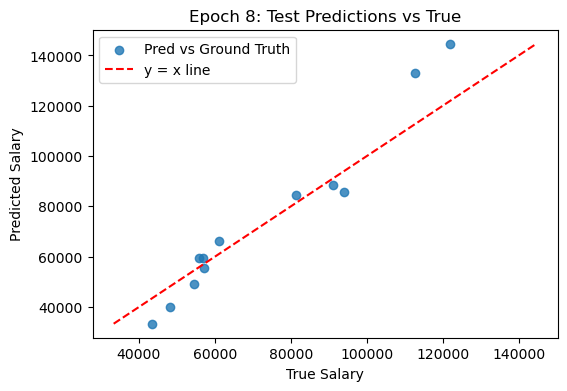

Epoch 8 | Train Loss = 106429185.7143, Test Loss = 105121216.0000


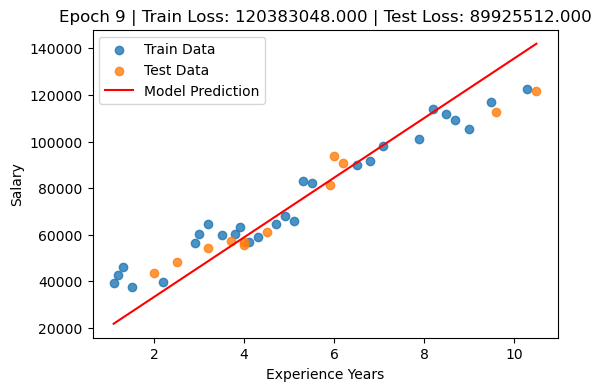

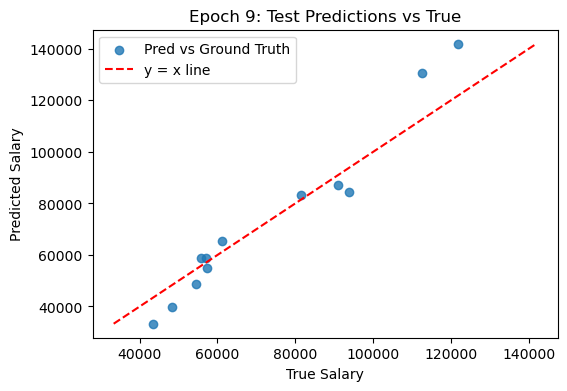

Epoch 9 | Train Loss = 120383048.0000, Test Loss = 89925512.0000


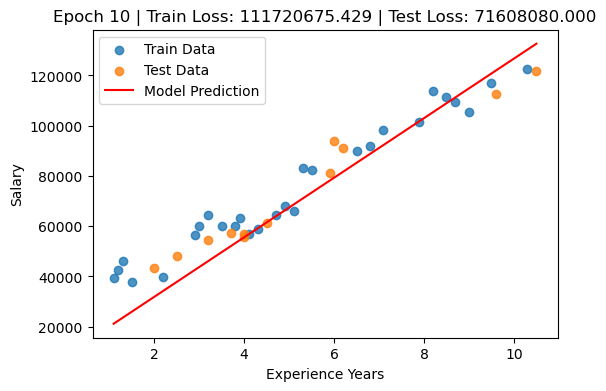

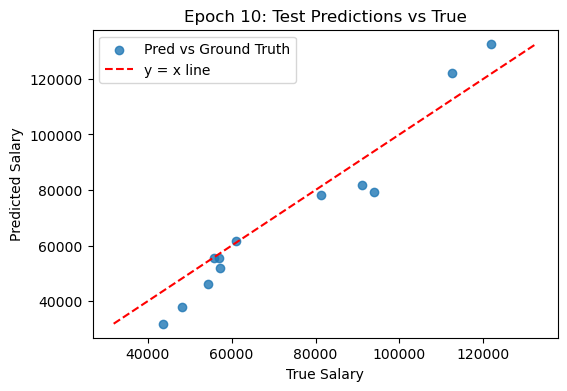

Epoch 10 | Train Loss = 111720675.4286, Test Loss = 71608080.0000

===== Final Learned Parameters =====
Weight (w) = 11855.103
Bias   (b) = 8160.731
Final Train MSE: 107608768.000
Final Test  MSE: 71608080.000


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# ============================
# 1) LOAD + SPLIT DATA
# ============================
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

X = salary['Experience Years'].values.reshape(-1, 1).astype(np.float32)
y = salary['Salary'].values.astype(np.float32)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_np)
y_train_tensor = torch.tensor(y_train_np)
X_test_tensor = torch.tensor(X_test_np)
y_test_tensor = torch.tensor(y_test_np)

# Create TensorDataset for train, then DataLoader for mini-batch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# ============================
# 2) DEFINE MODEL
# ============================
model = nn.Linear(in_features=1, out_features=1)

# ============================
# 3) LOSS + OPTIMIZER
# ============================
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# ============================
# 4) TRAIN LOOP (mini-batch)
# ============================
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(1, num_epochs + 1):
    model.train()  # put model in training mode (good practice even for linear)
    
    # We'll accumulate training loss over mini-batches to compute an average
    train_loss_accum = 0.0
    batch_count = 0
    
    # ----- Mini-Batch Training -----
    for batch_X, batch_y in train_loader:
        # Forward pass
        y_pred_train = model(batch_X).squeeze(-1)
        loss_train = criterion(y_pred_train, batch_y)

        # Backprop + update
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        # Accumulate
        train_loss_accum += loss_train.item()
        batch_count += 1

    # Average train loss across mini-batches
    epoch_train_loss = train_loss_accum / batch_count

    # ----- Evaluate on TEST set (no gradient) -----
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor).squeeze(-1)
        loss_test = criterion(y_pred_test, y_test_tensor)

    # ====== Figure 1: TRAIN & TEST points + regression line ======
    with torch.no_grad():
        # Combine + sort X for a continuous line
        X_all = torch.cat([X_train_tensor, X_test_tensor], dim=0)
        X_all_sorted, idx = torch.sort(X_all, dim=0)
        y_line_all = model(X_all_sorted).squeeze(-1)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_train_tensor.numpy(), y_train_tensor.numpy(), label='Train Data', alpha=0.8)
    plt.scatter(X_test_tensor.numpy(), y_test_tensor.numpy(), label='Test Data', alpha=0.8)
    plt.plot(X_all_sorted.numpy(), y_line_all.numpy(), color='red', label='Model Prediction')

    plt.title(
        f'Epoch {epoch} | '
        f'Train Loss: {epoch_train_loss:.3f} | '
        f'Test Loss: {loss_test.item():.3f}'
    )
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

    # ====== Figure 2: Predictions vs. Ground Truth on the TEST set ======
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_tensor.numpy(), y_pred_test.numpy(), alpha=0.8, label='Pred vs Ground Truth')

    # Reference line y = x
    min_val = min(y_test_tensor.min().item(), y_pred_test.min().item())
    max_val = max(y_test_tensor.max().item(), y_pred_test.max().item())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x line')

    plt.title(f'Epoch {epoch}: Test Predictions vs True')
    plt.xlabel('True Salary')
    plt.ylabel('Predicted Salary')
    plt.legend()
    plt.show()

    print(f"Epoch {epoch} | Train Loss = {epoch_train_loss:.4f}, Test Loss = {loss_test.item():.4f}")
    train_losses.append(epoch_train_loss)
    test_losses.append(loss_test.item())

# ============================
# 5) FINAL EVALUATION
# ============================
[w_param, b_param] = model.parameters()
print("\n===== Final Learned Parameters =====")
print(f"Weight (w) = {w_param.item():.3f}")
print(f"Bias   (b) = {b_param.item():.3f}")

model.eval()
with torch.no_grad():
    final_train_pred = model(X_train_tensor).squeeze(-1)
    final_train_loss = criterion(final_train_pred, y_train_tensor).item()
    
    final_test_pred = model(X_test_tensor).squeeze(-1)
    final_test_loss  = criterion(final_test_pred, y_test_tensor).item()

print(f"Final Train MSE: {final_train_loss:.3f}")
print(f"Final Test  MSE: {final_test_loss:.3f}")

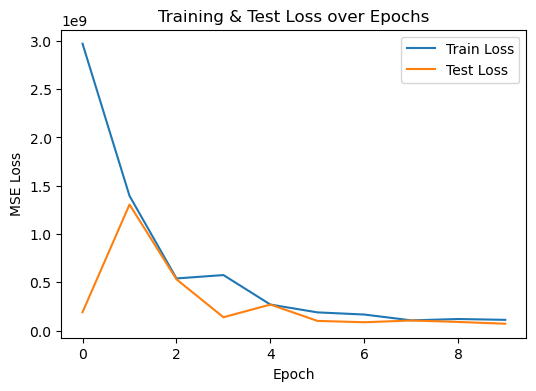

In [58]:
# plot the loss curve
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training & Test Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()
